<a href="https://colab.research.google.com/github/gihoonp/ADP_certificate_preperation/blob/main/ADP_%EC%8B%A4%EA%B8%B0_29%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 제 29회 ADP 실기 기출

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

1-1. 계약자고유번호를 기준으로 거주연도 별 여러개의 데이터가 쌓여 있다. 각 계약자고유번호에 대해 가장 최신의 거주연도 행만 남겨라.

데이터 설명 : 대구도시공사_빅데이터_영구임대아파트 입주자 퇴거여부 데이터, 고유번호를 가진 계약자와 특정 아파트에 대해 매년 퇴거여부를 기록한 데이터

In [ ]:
import pandas as pd
# 1.원본데이터 확인, X,Y데이터 정의
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p1.csv',encoding= 'cp949')
df.head()

,순번,계약구분,재계약횟수,거주개월,아파트 이름,아파트 ID,아파트 평점,호실고유번호,층,평형대,...,퇴거연도,거주연도,월세(원),보증금(원),대표나이,나이,성별,결혼여부,거주자 수,퇴거여부
0,1,유효,10,222,강남아파트,5,7.0,14520,1,12,...,NaN,2008,47100,3646000,46,33,남,미혼,3,미퇴거
1,1,유효,10,222,강남아파트,5,7.0,14520,1,12,...,NaN,2009,56500,4375000,46,34,남,미혼,3,미퇴거
2,1,유효,10,222,강남아파트,5,7.0,14520,1,12,...,NaN,2010,56500,4375000,46,35,남,미혼,3,미퇴거
3,1,유효,10,222,강남아파트,5,7.0,14520,1,12,...,NaN,2011,69900,5408000,46,36,남,미혼,3,미퇴거
4,1,유효,10,222,강남아파트,5,7.0,14520,1,12,...,NaN,2012,69900,5408000,46,37,남,미혼,3,미퇴거


In [ ]:
x = df.drop(['퇴거여부'], axis=1)
y = df['퇴거여부']

In [ ]:
df.info() # 결측치 있는 변수도 보이고,  int, object 변수가 섞여 있지만 실제 타입에 대해서는 아직 판단하기 이르다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86904 entries, 0 to 86903
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   순번       86904 non-null  int64  
 1   계약구분     86396 non-null  object 
 2   재계약횟수    86904 non-null  int64  
 3   거주개월     86904 non-null  int64  
 4   아파트 이름   86904 non-null  object 
 5   아파트 ID   86904 non-null  int64  
 6   아파트 평점   85679 non-null  float64
 7   호실고유번호   86904 non-null  int64  
 8   층        86904 non-null  int64  
 9   평형대      86904 non-null  int64  
 10  계약자고유번호  86904 non-null  int64  
 11  계약서고유번호  86904 non-null  int64  
 12  입주연도     86904 non-null  int64  
 13  퇴거연도     25762 non-null  float64
 14  거주연도     86904 non-null  int64  
 15  월세(원)    86904 non-null  int64  
 16  보증금(원)   86904 non-null  int64  
 17  대표나이     86904 non-null  int64  
 18  나이       86904 non-null  int64  
 19  성별       86904 non-null  object 
 20  결혼여부     86904 non-null  object 
 21  거주자 수    869

In [ ]:
len(df),len(df['계약자고유번호'].value_counts().index)
# 86903개의 데이터셋 중 10348개의 계약자고유번호가 있다.

(86904, 10348)

In [ ]:
df['아파트 ID'].value_counts() # 현재 수치형이지만, 실제로 범주형 변수로 보인다. 계약자고유번호, 계약서고유번호, 호실고유번호 또한 마찬가지다.

1    36148
2    33815
3    13756
4     1911
5     1274
Name: 아파트 ID, dtype: int64

In [ ]:
for i in ['아파트 ID','계약자고유번호', '계약서고유번호' ,'호실고유번호']:
    df[i] = df[i].astype('category')

In [ ]:
#각 계약자고유번호에 대해 가장 최신의 거주연도 행만 남기기.
df_recent = df.loc[df.groupby('계약자고유번호', as_index = False)['거주연도'].idxmax()['거주연도']] # idxmax(): 가장 큰 값의 index값을 가져온다.
df_recent.head()

,순번,계약구분,재계약횟수,거주개월,아파트 이름,아파트 ID,아파트 평점,호실고유번호,층,평형대,...,퇴거연도,거주연도,월세(원),보증금(원),대표나이,나이,성별,결혼여부,거주자 수,퇴거여부
85372,12673,해지,4,88,지산5단지아파트,3,8.0,85369,6,12,...,2012.0,2012,77300,5302000,44,35,남,기혼,2,퇴거
85427,12683,해지,7,174,지산5단지아파트,3,8.0,85421,6,15,...,2016.0,2016,48600,2144000,32,27,남,미혼,1,퇴거
85587,12702,유효,10,237,지산5단지아파트,3,8.0,85576,7,15,...,NaN,2020,81600,5598000,67,66,남,미혼,1,미퇴거
86190,12789,유효,10,227,지산5단지아파트,3,8.0,86179,10,19,...,NaN,2020,66600,3116000,61,60,남,기혼,3,미퇴거
86235,12796,유효,10,222,지산5단지아파트,3,8.0,86224,10,15,...,NaN,2020,129240,8865600,58,57,여,미혼,2,미퇴거


1-2. EDA 및 결측치 처리 (시각화 포함)

In [ ]:
# 폰트 설정
import matplotlib.pyplot as plt # 맷플롯립 import 하기
plt.rc('font', family='NanumBarunGothic')

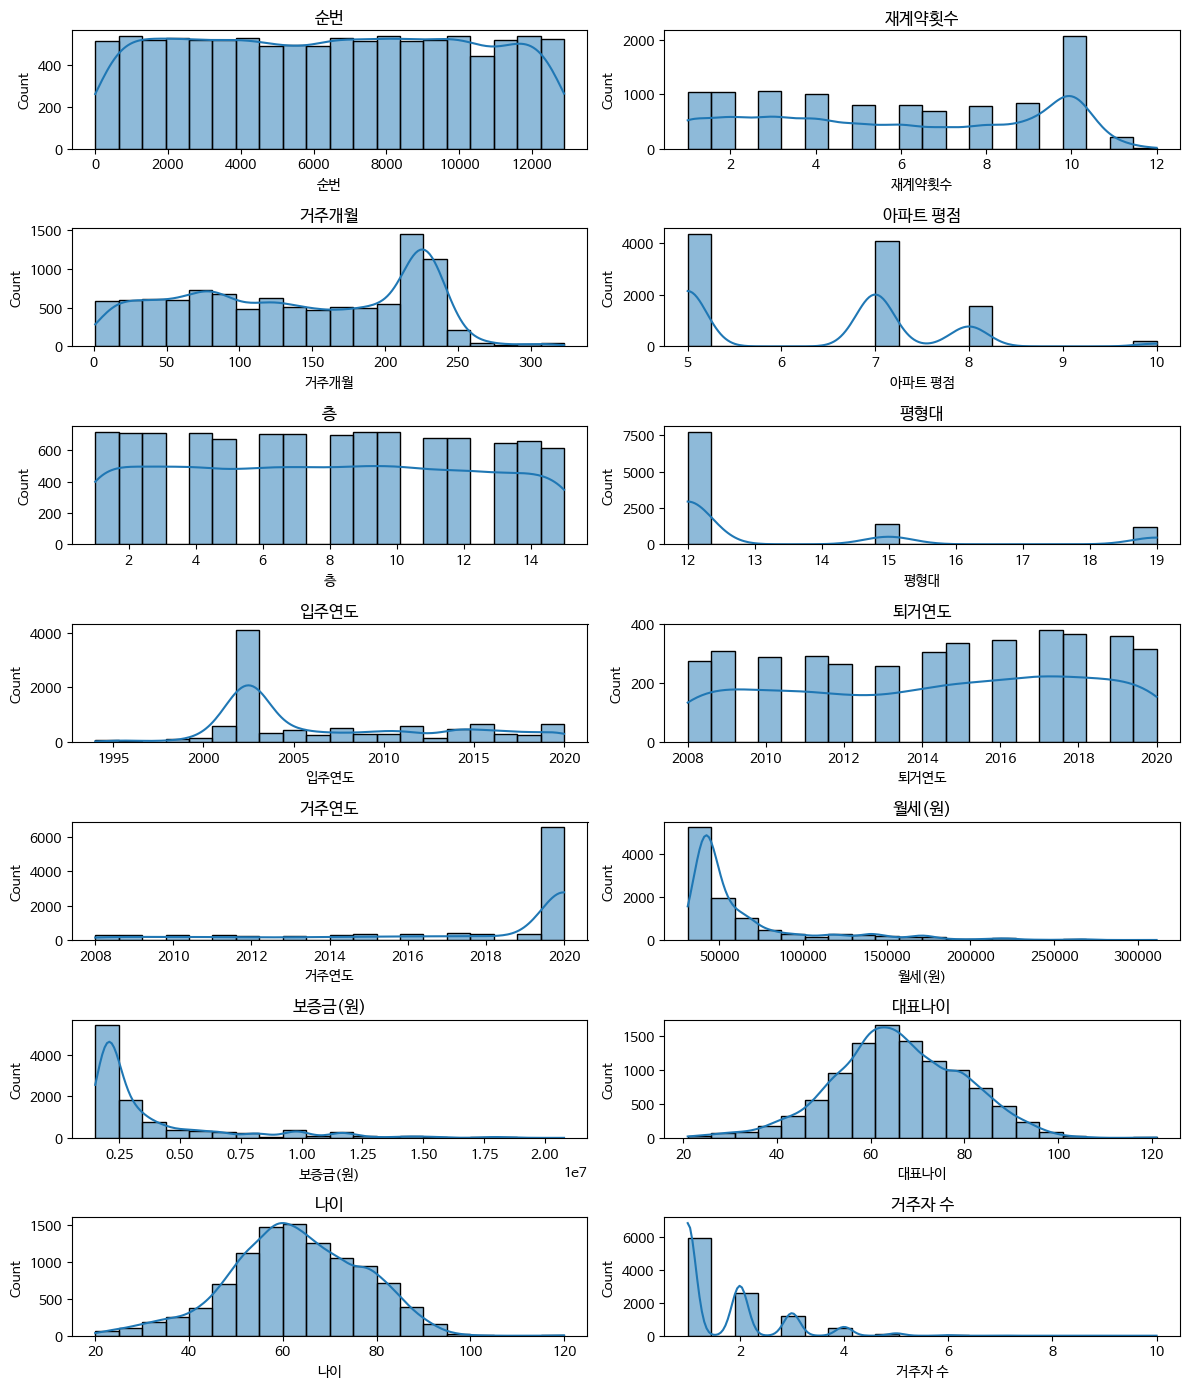

In [ ]:
# x 변수 분포 시각화 (연속형:히스토그램/박스플롯, 범주형:파이차트)
df2 = df_recent
int_columns = df2.select_dtypes(include='number').columns
n = len(int_columns)

# 연속형 히스토그램
import seaborn as sns
import pandas as pd
import numpy as np
rows = n // 2 + n % 2  # 마지막 줄은 변수| 개수가 홀수일 때만 사용
cols = 2
# 히스토그램을 행x열 그리드로 나누기
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 2 * rows))
# 변수 인덱스
var_index = 0
# 히스토그램 그리기
for i in range(rows):
    for j in range(cols):
        if var_index < len(int_columns):
            # 마지막 변수일 경우 예외 처리
            if var_index == n - 1 and n % 2 == 1:  # 변수 개수가 홀수인 경우
                sns.histplot(df2[int_columns].iloc[:, var_index], bins=20, kde=True, ax=axes[i, 0])
                axes[i, 0].set_title(int_columns[var_index])
                axes[i, 1].axis('off')  # 두 번째 열은 비워두기
            else:
                sns.histplot(df2[int_columns].iloc[:, var_index], bins=20, kde=True, ax=axes[i, j])
                axes[i, j].set_title(int_columns[var_index])
        var_index += 1
# 그래프 간 간격 조절
plt.tight_layout()
# 그래프 표시
plt.show()

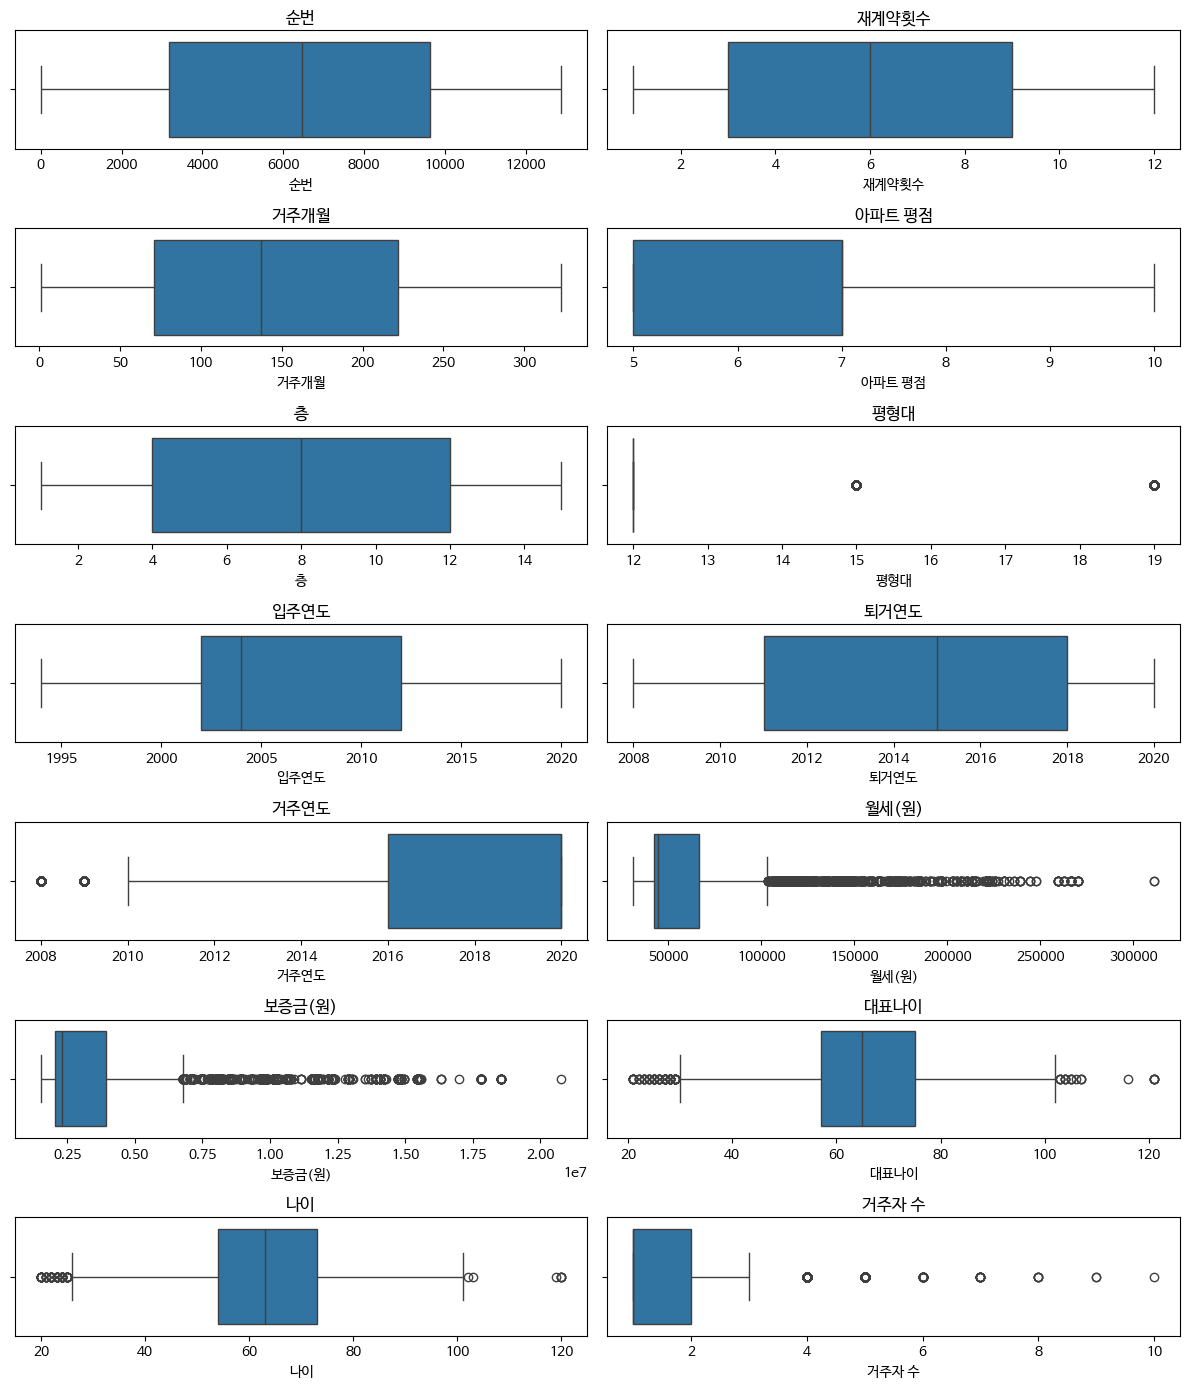

In [ ]:
# 박스플롯
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 2 * rows))
# 변수 인덱스
var_index = 0
# 박스플롯 그리기
for i in range(rows):
    for j in range(cols):
        # Check if var_index is within the bounds
        if var_index < len(int_columns):
            if var_index == n - 1 and n % 2 == 1: # 변수 개수가 홀수인 경우
                sns.boxplot(x=df2[int_columns[var_index]], ax=axes[i, 0])
                axes[i, 0].set_title(int_columns[var_index])
                axes[i, 1].axis('off')
            else:
                sns.boxplot(x=df2[int_columns[var_index]], ax=axes[i, j])
                axes[i, j].set_title(int_columns[var_index])
        var_index += 1

# 그래프 간 간격 조절 후 그래프 표시
plt.tight_layout()
plt.show()

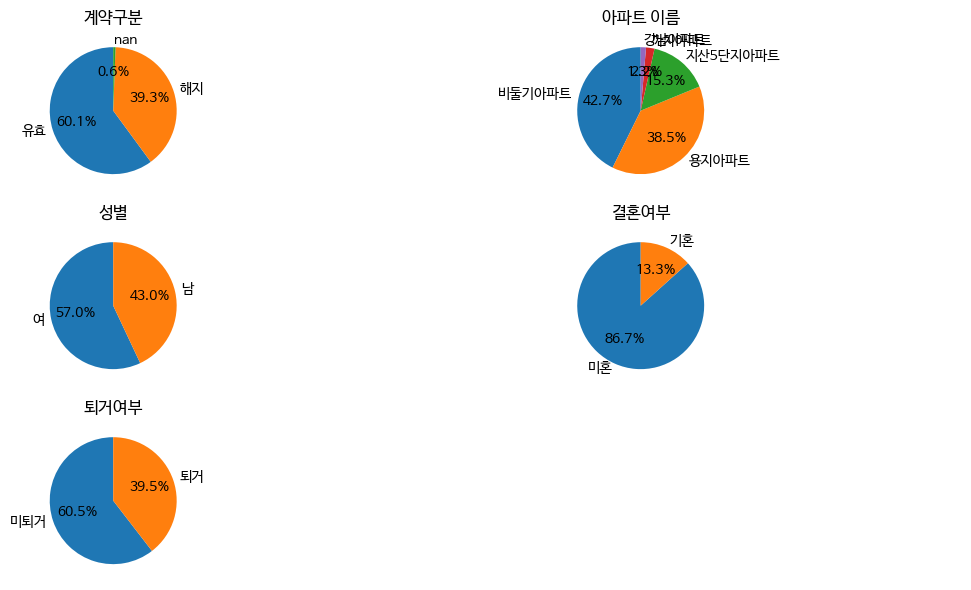

In [ ]:
# 범주형 파이차트. (category 타입으로 바꾼 '아파트 ID','계약자고유번호', '계약서고유번호' ,'호실고유번호' 제외,  현재 object 타입인 변수만 시각화하는 것이 유의미하다고 생각.)
obj_columns = df2.select_dtypes(include='object').columns
n = len(obj_columns)
rows = n // 2 + n % 2  # 마지막 줄은 변수 개수가 홀수일 때만 사용
cols = 2

# 파이차트를 행x열 그리드로 나누기
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 2 * rows))
# 변수 인덱스
variable_index = 0
# 파이차트 그리기
for i in range(rows):
    for j in range(cols):
        if variable_index < len(obj_columns):
            if variable_index == n - 1 and n % 2 == 1:
                sizes = df2[obj_columns].iloc[:, variable_index].value_counts(dropna=False) # NaN도 포함
                axes.flatten()[i * cols].pie(sizes.values, labels=sizes.index, autopct='%1.1f%%', startangle=90)
                axes.flatten()[i * cols].set_title(obj_columns[variable_index])
                axes.flatten()[i * cols+1].axis('off')
            else:
                sizes = df2[obj_columns].iloc[:, variable_index].value_counts(dropna=False)
                axes.flatten()[i * cols + j].pie(sizes.values, labels=sizes.index, autopct='%1.1f%%', startangle=90)
                axes.flatten()[i * cols + j].set_title(obj_columns[variable_index])
        variable_index += 1

# 그래프 간 간격 조절
plt.tight_layout()
# 그래프 표시
plt.show()

In [ ]:
# 결측치 확인 및 처리
df2.isin([np.nan, "", None, np.inf, pd.isna]).sum()

순번            0
계약구분         61
재계약횟수         0
거주개월          0
아파트 이름        0
아파트 ID        0
아파트 평점      140
호실고유번호        0
층             0
평형대           0
계약자고유번호       0
계약서고유번호       0
입주연도          0
퇴거연도       6256
거주연도          0
월세(원)         0
보증금(원)        0
대표나이          0
나이            0
성별            0
결혼여부          0
거주자 수         0
퇴거여부          0
dtype: int64

In [ ]:
df2.groupby('퇴거여부')['퇴거연도'].count().reset_index() # '퇴거여부'가 '퇴거'인 경우만 '퇴거연도' 데이터가 있는 것으로 파악

,퇴거여부,퇴거연도
0,미퇴거,0
1,퇴거,4092


In [ ]:
# '퇴거연도' 변수는 결측치가 너무 많고, '퇴거여부'가 '퇴거'인 경우만 '퇴거연도' 데이터가 있는 것으로 파악되어 '퇴거여부'와 '입주연도','거주개월' 등 변수들로 '퇴거연도' 정보를 유추할 수 있다고 판단하여 '퇴거연도' 열을 삭제한다.

In [ ]:
# 범주형 변수인 '계약구분'의 경우, 가장 빈번한 범주로 대체한다.
# '아파트 평점' 변수는 결측치를 평균으로 대체해준다.

df2['계약구분'] = df2['계약구분'].fillna(df2['계약구분'].value_counts().index[0])
df2['아파트 평점'] = df2['아파트 평점'].fillna(df2['아파트 평점'].mean())
df2 = df2.drop(['퇴거연도'],axis=1)

1-3. 이상치 처리

In [ ]:
# 학습에 무관하다고 판단되는 '순번','아파트 이름' '호실고유번호', '계약자고유번호','계약서고유번호' 변수 제거.
df3 = df2.drop(['순번','아파트 이름', '호실고유번호','계약자고유번호','계약서고유번호'],axis=1) # 아파트 이름은 아파트 ID로 대체가능함.
df3.head()

,계약구분,재계약횟수,거주개월,아파트 ID,아파트 평점,층,평형대,입주연도,거주연도,월세(원),보증금(원),대표나이,나이,성별,결혼여부,거주자 수,퇴거여부
85372,해지,4,88,3,8.0,6,12,2005,2012,77300,5302000,44,35,남,기혼,2,퇴거
85427,해지,7,174,3,8.0,6,15,2001,2016,48600,2144000,32,27,남,미혼,1,퇴거
85587,유효,10,237,3,8.0,7,15,2001,2020,81600,5598000,67,66,남,미혼,1,미퇴거
86190,유효,10,227,3,8.0,10,19,2002,2020,66600,3116000,61,60,남,기혼,3,미퇴거
86235,유효,10,222,3,8.0,10,15,2003,2020,129240,8865600,58,57,여,미혼,2,미퇴거


In [ ]:
# 사분위수 기준으로 Q1 - 3.0*IQR과 Q3 + 3.0*IQR 사이에 분포하지 않는 데이터를 이상치로 정의 후 제거한다.

def remove_outliers_iqr(data, columns):
    outlier_indices = []
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3.0 * IQR
        upper_bound = Q3 + 3.0 * IQR
        # 이상치 인덱스 취합
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outlier_indices.extend(outliers.index)
    # 중복된 인덱스 제거
    unique_outlier_indices = list(set(outlier_indices))
    # 이상치 제거
    df_outliers_removed = data.drop(unique_outlier_indices)
    return df_outliers_removed

columns_to_remove_outliers = df3.select_dtypes(include='number').columns
df_no_outliers = remove_outliers_iqr(df3, columns_to_remove_outliers)
df_no_outliers

,계약구분,재계약횟수,거주개월,아파트 ID,아파트 평점,층,평형대,입주연도,거주연도,월세(원),보증금(원),대표나이,나이,성별,결혼여부,거주자 수,퇴거여부
85372,해지,4,88,3,8.0,6,12,2005,2012,77300,5302000,44,35,남,기혼,2,퇴거
79468,해지,4,101,3,8.0,2,12,2000,2008,46000,3575000,66,53,남,미혼,3,퇴거
79534,유효,10,222,3,8.0,3,12,2003,2020,41300,1959000,90,89,남,미혼,1,미퇴거
79696,해지,4,106,3,8.0,4,12,2003,2011,75000,4290000,73,63,남,기혼,4,퇴거
80345,해지,6,124,3,8.0,7,12,2005,2015,116800,8017000,69,63,여,미혼,2,퇴거
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,유효,1,9,5,7.0,3,12,2020,2020,42800,2078000,69,68,남,미혼,1,미퇴거
25,유효,1,8,5,7.0,1,12,2020,2020,38000,2078000,66,65,남,미혼,1,미퇴거
56928,유효,6,133,2,7.0,10,12,2010,2020,43600,2052000,55,54,남,미혼,1,미퇴거
54074,유효,10,222,2,7.0,3,12,2003,2020,42400,2052000,42,41,여,미혼,1,미퇴거


In [ ]:
df_no_outliers.describe() # 또한, 나이, 대표나이가 120살 이상인 데이터가 보인다.

,재계약횟수,거주개월,아파트 평점,층,평형대,입주연도,거주연도,월세(원),보증금(원),대표나이,나이,거주자 수
count,7194.000000,7194.000000,7194.000000,7194.000000,7194.0,7194.000000,7194.000000,7194.000000,7.194000e+03,7194.000000,7194.000000,7194.000000
mean,5.444259,127.832499,6.213600,7.823186,12.0,2007.615930,2017.501668,48868.063664,2.740603e+06,66.314707,62.816375,1.489158
std,3.149285,76.624496,1.161335,4.298909,0.0,6.347723,3.769319,17755.781125,1.484159e+06,14.238995,14.797068,0.788283
min,1.000000,1.000000,5.000000,1.000000,12.0,1994.000000,2008.000000,31300.000000,1.520000e+06,21.000000,20.000000,1.000000
25%,3.000000,62.000000,5.000000,4.000000,12.0,2002.000000,2015.000000,40400.000000,2.052000e+06,57.000000,53.000000,1.000000
50%,5.000000,122.000000,7.000000,8.000000,12.0,2005.000000,2020.000000,42400.000000,2.062000e+06,65.000000,63.000000,1.000000
75%,8.000000,202.000000,7.000000,11.000000,12.0,2014.000000,2020.000000,46800.000000,2.622000e+06,77.000000,74.000000,2.000000
max,12.000000,323.000000,8.000000,15.000000,12.0,2020.000000,2020.000000,139200.000000,9.314000e+06,121.000000,120.000000,5.000000


In [ ]:
# 나이, 대표나이가 100살 이상인 데이터는 각각 이상치에 민감하지 않은 중앙값 나이로 처리해준다.
df_no_outliers['나이'] = df_no_outliers['나이'].apply(lambda x : x if x<100 else df_no_outliers['나이'].median())
df_no_outliers['대표나이'] = df_no_outliers['대표나이'].apply(lambda x : x if x<100 else df_no_outliers['대표나이'].median())
df_no_outliers.describe()

,재계약횟수,거주개월,아파트 평점,층,평형대,입주연도,거주연도,월세(원),보증금(원),대표나이,나이,거주자 수
count,7194.000000,7194.000000,7194.000000,7194.000000,7194.0,7194.000000,7194.000000,7194.000000,7.194000e+03,7194.000000,7194.000000,7194.000000
mean,5.444259,127.832499,6.213600,7.823186,12.0,2007.615930,2017.501668,48868.063664,2.740603e+06,66.111760,62.771337,1.489158
std,3.149285,76.624496,1.161335,4.298909,0.0,6.347723,3.769319,17755.781125,1.484159e+06,13.966466,14.723122,0.788283
min,1.000000,1.000000,5.000000,1.000000,12.0,1994.000000,2008.000000,31300.000000,1.520000e+06,21.000000,20.000000,1.000000
25%,3.000000,62.000000,5.000000,4.000000,12.0,2002.000000,2015.000000,40400.000000,2.052000e+06,57.000000,53.000000,1.000000
50%,5.000000,122.000000,7.000000,8.000000,12.0,2005.000000,2020.000000,42400.000000,2.062000e+06,65.000000,63.000000,1.000000
75%,8.000000,202.000000,7.000000,11.000000,12.0,2014.000000,2020.000000,46800.000000,2.622000e+06,76.000000,74.000000,2.000000
max,12.000000,323.000000,8.000000,15.000000,12.0,2020.000000,2020.000000,139200.000000,9.314000e+06,99.000000,99.000000,5.000000


2-1. 재계약 횟수의 중앙값을 기준으로 중앙값보다 크거나 같으면 ‘높음’, 작으면 ‘낮음’ 으로 재계약 횟수 이분 변수를 구성하시오

In [ ]:
df4 = df_no_outliers.copy()
md = np.median(df_no_outliers['재계약횟수']) # 중앙값 : 5
df4['재계약횟수이분'] = df4['재계약횟수'].apply(lambda x : '높음' if x >= md else '낮음')
df4.head()

,계약구분,재계약횟수,거주개월,아파트 ID,아파트 평점,층,평형대,입주연도,거주연도,월세(원),보증금(원),대표나이,나이,성별,결혼여부,거주자 수,퇴거여부,재계약횟수이분
85372,해지,4,88,3,8.0,6,12,2005,2012,77300,5302000,44.0,35.0,남,기혼,2,퇴거,낮음
79468,해지,4,101,3,8.0,2,12,2000,2008,46000,3575000,66.0,53.0,남,미혼,3,퇴거,낮음
79534,유효,10,222,3,8.0,3,12,2003,2020,41300,1959000,90.0,89.0,남,미혼,1,미퇴거,높음
79696,해지,4,106,3,8.0,4,12,2003,2011,75000,4290000,73.0,63.0,남,기혼,4,퇴거,낮음
80345,해지,6,124,3,8.0,7,12,2005,2015,116800,8017000,69.0,63.0,여,미혼,2,퇴거,높음


2-2. 차원축소의 필요성을 논하고, 필요에 따라 차원을 축소하고 불필요하다면 그 근거를 논하시오.

In [ ]:
# 컴퓨팅 자원 등 시간과 비용 감소시키기 위해 차원축소를 시행하나, 현 차원에서 퇴거여부와 무관하다고 판단되는 변수들('순번','아파트 이름','아파트 ID', '호실고유번호','계약자고유번호','계약서고유번호')과 결측치가 다소 존재하는 변수들을 제거하였으므로, 차원축소 필요없다고 판단하였다.

3-1. 재계약 횟수 이분변수를 기준으로 세그먼트를 구분하고 각 세그먼트의 특징을 분석하시오.

In [ ]:
# 연속형 변수 분석
df5 = df4.drop(['재계약횟수'], axis=1)
df5.groupby('재계약횟수이분')[df5.select_dtypes(include='number').columns].agg([np.mean])

,거주개월,아파트 평점,층,평형대,입주연도,거주연도,월세(원),보증금(원),대표나이,나이,거주자 수
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
재계약횟수이분,,,,,,,,,,,
낮음,57.226618,6.164128,7.782582,12.0,2012.210365,2016.401104,43850.306654,2.311731e+06,64.352346,59.951855,1.466115
높음,186.374523,6.254619,7.856852,12.0,2003.806509,2018.414188,53028.476990,3.096197e+06,67.570557,65.109077,1.508263


In [ ]:
# 재약횟수이분 변수가 '높음'이면 '낮음'에 비해 '거주개월'이 길고, '입주연도'가 오래되었으며, '월세'와 '보증금'은 높은 것으로 보인다. '나이'도 다소 높은 것으로 보인다.

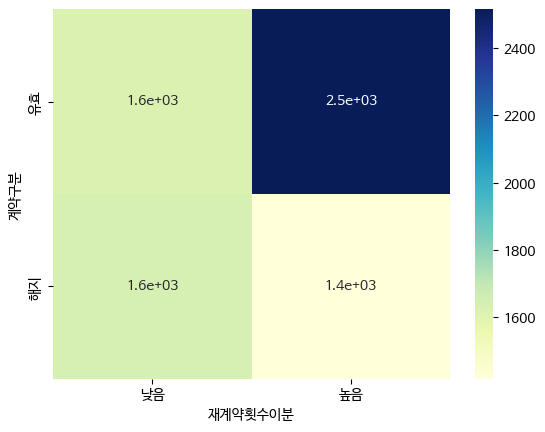

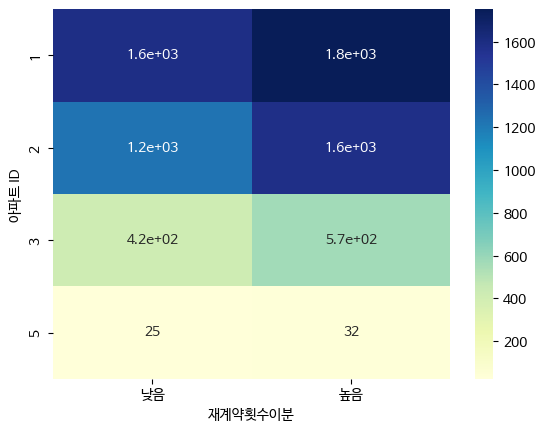

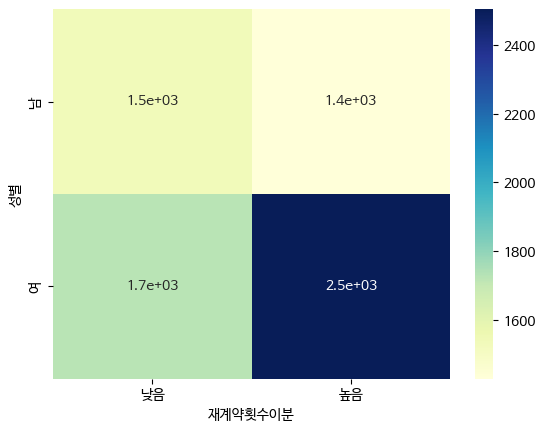

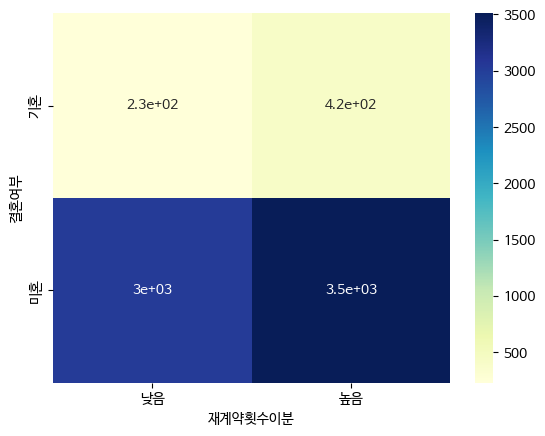

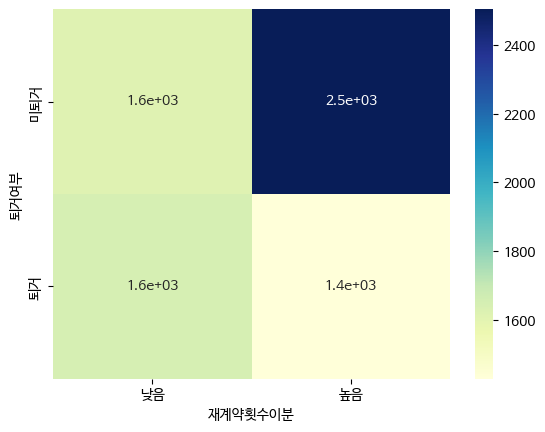

In [ ]:
# 범주형 변수 분석 - cross tab heatmap
for i in df5.select_dtypes(exclude='number').columns[:-1]: # ['계약구분', '아파트 ID', '성별', '결혼여부', '퇴거여부']
    sns.heatmap(pd.crosstab(df5[i], df5['재계약횟수이분']), annot=True, cmap='YlGnBu')
    plt.show()
# 재계약회수가 높은 세그먼트에서 특히 계약구분이 '유효'인 경우가 많았고, 성별이 '여성'인 경우도 많았으며, 퇴거여부가 '미퇴거'인 경우가 많았다.

3-2. 재계약횟수 변수를 종속변수로 하는 회귀 분석을 두 가지 이상의 방법론을 통해 수행하고 최종 모델을 결정하시오. 재계약횟수 이분변수를 종속변수로 하는 분류 분석을 두가지 이상의 방법론을 통해 수행하고 최종 모델을 결정하시오.

In [ ]:
# 학습 전 원핫인코딩

# 재계약횟수 변수를 종속변수로 하는 데이터셋 : df3
# 재계약횟수 이분변수를 종속변수로 하는 데이터셋 : df5
df3_dummy = df3.copy()
df3_dummy = pd.get_dummies(df3, drop_first=True)
df3_dummy.head()

,재계약횟수,거주개월,아파트 평점,층,평형대,입주연도,거주연도,월세(원),보증금(원),대표나이,나이,거주자 수,계약구분_해지,아파트 ID_2,아파트 ID_3,아파트 ID_4,아파트 ID_5,성별_여,결혼여부_미혼,퇴거여부_퇴거
85372,4,88,8.0,6,12,2005,2012,77300,5302000,44,35,2,1,0,1,0,0,0,0,1
85427,7,174,8.0,6,15,2001,2016,48600,2144000,32,27,1,1,0,1,0,0,0,1,1
85587,10,237,8.0,7,15,2001,2020,81600,5598000,67,66,1,0,0,1,0,0,0,1,0
86190,10,227,8.0,10,19,2002,2020,66600,3116000,61,60,3,0,0,1,0,0,0,0,0
86235,10,222,8.0,10,15,2003,2020,129240,8865600,58,57,2,0,0,1,0,0,1,1,0


In [ ]:
df5_dummy = df5.copy()
df5_dummy = pd.get_dummies(df5_dummy, drop_first=True)
df5_dummy.head()

,거주개월,아파트 평점,층,평형대,입주연도,거주연도,월세(원),보증금(원),대표나이,나이,거주자 수,계약구분_해지,아파트 ID_2,아파트 ID_3,아파트 ID_4,아파트 ID_5,성별_여,결혼여부_미혼,퇴거여부_퇴거,재계약횟수이분_높음
85372,88,8.0,6,12,2005,2012,77300,5302000,44.0,35.0,2,1,0,1,0,0,0,0,1,0
79468,101,8.0,2,12,2000,2008,46000,3575000,66.0,53.0,3,1,0,1,0,0,0,1,1,0
79534,222,8.0,3,12,2003,2020,41300,1959000,90.0,89.0,1,0,0,1,0,0,0,1,0,1
79696,106,8.0,4,12,2003,2011,75000,4290000,73.0,63.0,4,1,0,1,0,0,0,0,1,0
80345,124,8.0,7,12,2005,2015,116800,8017000,69.0,63.0,2,1,0,1,0,0,1,1,1,1


In [ ]:
# 재계약횟수 변수를 종속변수로 하는 회귀 분석 : 단순선형 회귀분석, Ridge 회귀
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import f1_score, accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler

x3 = df3_dummy.drop(['재계약횟수'], axis=1)
y3 = df3_dummy['재계약횟수']

x_train, x_test, y_train, y_test = train_test_split(x3, y3, random_state=0)

# ct : 연속형 변수만 standard scaling 처리.
ct = make_column_transformer((StandardScaler(), ['거주개월', '아파트 평점', '층', '평형대', '입주연도', '거주연도','월세(원)', '보증금(원)', '대표나이', '나이', '거주자 수']),remainder='passthrough') # 수치형 데이터만 scaling
ct.fit(x_train)
x_train_sc = ct.transform(x_train)
x_test_sc = ct.transform(x_test)

ridge = Ridge().fit(x_train_sc, y_train)
y_pred = ridge.predict(x_test_sc)
print('R2:',r2_score(y_pred, y_test))
print('RMSE:',np.sqrt(mean_squared_error(y_pred, y_test)))

R2: 0.9432399607600814
RMSE: 0.7493106081187205


In [ ]:
lr = LinearRegression().fit(x_train_sc, y_train)
y_pred = lr.predict(x_test_sc)
print('R2:',r2_score(y_pred, y_test))
print('RMSE:',np.sqrt(mean_squared_error(y_pred, y_test))) # 모델의 데이터 설명력인 R2가 더 높은 Ridge 모델을 최종 선택하였다.

R2: 0.9431891544109575
RMSE: 0.7499203952537442


In [ ]:
# 재계약횟수 이분변수를 종속변수로 하는 분류 모델 : XGBoost, 의사결정트리

x5 = df5_dummy.drop(['재계약횟수이분_높음'], axis=1)
y5 = df5_dummy['재계약횟수이분_높음']

from sklearn.tree import DecisionTreeClassifier
from xgboost import plot_importance, XGBClassifier
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x5, y5, random_state=0)

# ct : 연속형 변수만 standard scaling 처리.
ct = make_column_transformer((StandardScaler(), ['거주개월', '아파트 평점', '층', '평형대', '입주연도', '거주연도','월세(원)', '보증금(원)', '대표나이', '나이', '거주자 수']),remainder='passthrough') # 수치형 데이터만 scaling
ct.fit(x_train)
x_train_sc = ct.transform(x_train)
x_test_sc = ct.transform(x_test)

dc = DecisionTreeClassifier()
dc.fit(x_train_sc, y_train)
y_pred = dc.predict(x_test_sc)
print('accuracy_score:', accuracy_score(y_pred, y_test))
print('f1_score:', f1_score(y_pred, y_test))

accuracy_score: 0.9571984435797666
f1_score: 0.9607343192248853


In [ ]:
xg = XGBClassifier()
xg.fit(x_train_sc, y_train)
y_pred = xg.predict(x_test_sc)
print('accuracy_score:', accuracy_score(y_pred, y_test))
print('f1_score:', f1_score(y_pred, y_test)) # 정확도, f1 모두 높은 XGBClassifier 모델을 최종선택하였다.

accuracy_score: 0.9744302390216787
f1_score: 0.9767676767676768


3-3. 최종 채택한 모델에서 각각 유의하게 작용하는 변수를 확인 하고 설명하시오

In [ ]:
# 회귀분석 최종 채택 모델 : Ridge 회귀 모델 -  회귀분석 모델 계수의 절댓값으로 feature improtance을 확인한다.
ridge_df = pd.DataFrame(columns=['var','coef'])
ridge_df['var'] = x3.columns
ridge_df['coef'] = ridge.coef_
ridge_df['abs_coef'] = ridge_df['coef'].apply(lambda x: np.abs(x))
ridge_df.head()

,var,coef,abs_coef
0,거주개월,4.231814,4.231814
1,아파트 평점,-0.134261,0.134261
2,층,0.021804,0.021804
3,평형대,0.112361,0.112361
4,입주연도,1.253521,1.253521


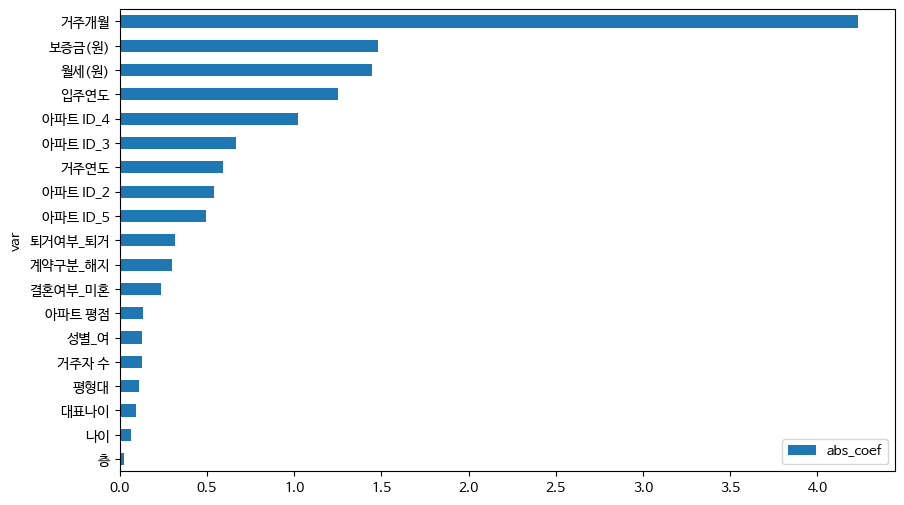

In [ ]:
# 회귀계수 절댓값
ridge_df.sort_values(by='abs_coef').plot(x='var', y='abs_coef', kind='barh', figsize=(10, 6))
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


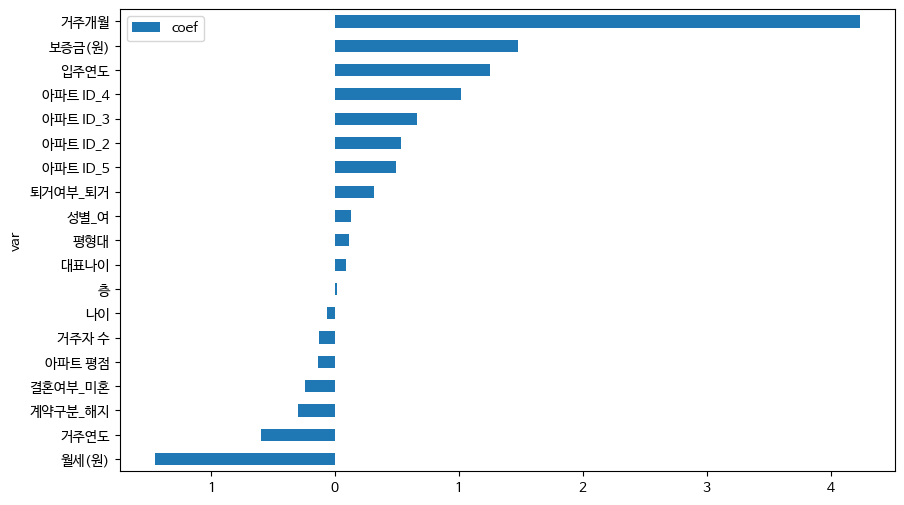

In [ ]:
# 회귀계수 값
ridge_df.sort_values(by='coef').plot(x='var', y='coef', kind='barh', figsize=(10, 6))
plt.show()

In [ ]:
# 거주개월 > 보증금 > 월세 > 아파트 ID > 입주연도 순으로 재계약 횟수에 큰 영향을 주는 것으로 보인다.
# 거주개월이 길고 보증금이 많으며 입주연도가 최근 연도일수록 재계약 횟수가 많은 데에 기여하고, 월세가 많을수록 재계약 횟수가 적어지는 것으로 보인다.
# 아파트 ID는 4,3,2,5 순으로 재계약 횟수에 긍정적 영향을 주는 것으로 보아, 아파트 종류 또한 재계액 횟수에 기여한다고 해석할 수 있다.

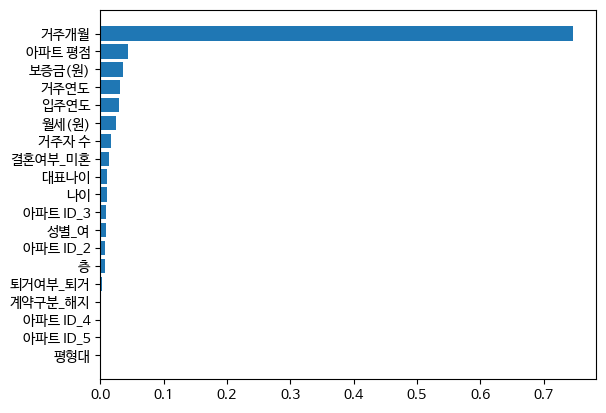

In [ ]:
# 분류모형 최종 채택 모델 : XGBClassifier 모델 - 트리계열 모델에서 ‘불순도’를 감소시키는 데 각 변수가 기여한 정도를 계산하는 model.feature_importances_ 확인.
fi = xg.feature_importances_
fn = x5.columns
xgb_importance = pd.DataFrame({'fi':fi, 'fn':fn}).sort_values(by='fi')
plt.barh(xgb_importance['fn'], xgb_importance['fi'])
plt.show()

In [ ]:
# 거주개월 > 아파트 평점 > 보증금 > 입주연도 > 거주연도 > 월세 순으로 재계약 횟수 이분변수에 영향을 주는 것으로 보인다.

3-4.해당 데이터 분석결과로 얻을 수 있는 점 제시



In [ ]:
# 재계약 횟수 및 유무는 특히 '거주개월','보증금','월세', '입주연도' 변수에 영향을 많이 받는 것으로 분석된다.
# 1. 거주개월이 길수록 재계약 횟수가 증가하는 경향을 보인다. 하지만 재계약을 함으로써 거주개월이 늘어나는 것이기 때문에 역인과성으로 해석될 여지가 있다.
# 2. 최근에 입주할수록 재계약횟수가 많은 경향을 보인다. 최근 입주자는 과거에 비해 거주지를 옮기지 않고 재계약을 선호하거나, 재계약 주기 자체가 짧아졌을수도 있다.
# 3. 보증금이 많고, 월세가 적을수록 재계약 횟수가 증가하는 경향이다. 거주자는 월세가 비싼 것에 민감하기 때문에, 월세를 줄이고 보증금으로 계약하는 것을 더 선호하는 것으로 보인다.

4-1. 각 회차별로 1번 타자의 출루 (1,2,3루타와 사사구(볼넷, 몸에맞는공))가 있는 경우에 대해 득점이 발생 했는지 확인하고자 한다. 이를 위한 전처리를 수행하라. (단, 첫 번째 혹은 두 번째 타자가 홈런을 친 경우 해당 회차 데이터는 제외한다.)

데이터 출처 : https://www.kaggle.com/datasets/pschale/mlb-pitch-data-20152018 데이터를 후처리

데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p2_.csv

데이터 설명 :

A 야구구단의 시합 결과중 일부를 나타낸다.
각 행은 하나의 경기를 의미(game_id)하며 9회차(= 9이닝) 동안 1번타자, 2번타자의 출루 정보를 의미한다.
각 컬럼에 대한 설명은 아래 이미지와 같으며, value값의 index는 이미지의 ‘수치 의미’ 열을 통해 확인 할 수 있다.

In [ ]:
import pandas as pd
# 1.원본데이터 확인, X,Y데이터 정의
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p2_.csv',encoding= 'cp949')
df.head()

,game_id,a1_1,a1_2,a2_1,a2_2,a3_1,a3_2,a4_1,a4_2,a5_1,...,a9_2,b1,b2,b3,b4,b5,b6,b7,b8,b9
0,201900016,5,5,5,5,5,5,5,5,5,...,5,0,0,0,0,0,0,0,4,2
1,201900023,6,4,5,5,2,5,1,1,6,...,7,3,0,0,1,0,1,3,1,0
2,201900103,5,6,5,5,1,9,5,4,6,...,6,0,0,1,1,4,1,2,0,1
3,201900112,5,7,6,1,5,5,1,5,1,...,5,0,3,0,0,0,0,1,0,0
4,201900131,5,1,2,5,2,5,7,2,6,...,6,0,2,4,1,2,2,0,1,0


In [ ]:
df = df.drop(['game_id'],axis=1) # game_id 행 삭제.

In [ ]:
# '회차','1번타자','2번타자','득점' 열로 이루어진 데이터프레임 생성
new_df = pd.DataFrame(columns=['회차','1번타자','2번타자','득점'])
n = []
d1 = []
d2 = []
score = []
for i in range(1,10):
    n += [i]*200
    d1 += list(df['a{}_1'.format(i)])
    d2 += list(df['a{}_2'.format(i)])
    score += list(df['b{}'.format(i)])

new_df['회차'] = n
new_df['1번타자'] = d1
new_df['2번타자'] = d2
new_df['득점'] = score
new_df['득점여부'] = new_df['득점'].apply(lambda x : 0 if x ==0 else 1)
new_df.head()

,회차,1번타자,2번타자,득점,득점여부
0,1,5,5,0,0
1,1,6,4,3,1
2,1,5,6,0,0
3,1,5,7,0,0
4,1,5,1,0,0


In [ ]:
new_df.info() # 1번타자 데이터에 object 있는 것으로 보아 결측치, 혹은 문자가 데이터셋에 포함되어있는지 확인이 필요하다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   회차      1800 non-null   int64 
 1   1번타자    1800 non-null   object
 2   2번타자    1800 non-null   int64 
 3   득점      1800 non-null   int64 
 4   득점여부    1800 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 70.4+ KB


In [ ]:
new_df.isna().sum() # 결측치는 없는 것으로 보인다.

회차      0
1번타자    0
2번타자    0
득점      0
득점여부    0
dtype: int64

In [ ]:
new_df['1번타자'].value_counts(), new_df['2번타자'].value_counts()
# 위에서 결측치는 없었지만, ' ', '"',' :','&'과 '숫자' 데이터 때문에 1번타자 변수의 타입이 object인 것으로 보인다.

(5     423
 5     342
 7     205
 7     154
 1     139
 1     114
 6      84
 2      79
 6      71
 4      54
 2      49
 4      38
        12
 8      12
 8       7
 &       5
 3       4
 3       3
 "       3
  :      2
 Name: 1번타자, dtype: int64,
 5    762
 7    364
 1    259
 6    129
 9     89
 2     88
 4     84
 8     14
 3     11
 Name: 2번타자, dtype: int64)

In [ ]:
error_chr = [' ', '"', ' :', '&']
filtered_df = new_df[~new_df['1번타자'].isin(error_chr)] # ' ', '"',':','&' 데이터 삭제 처리
filtered_df['1번타자'] = filtered_df['1번타자'].astype(int) # 숫자 1, 공백 포함된 1 등등을 모두 숫자1로 타입변환

<ipython-input-44-933c7a43ea77>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['1번타자'] = filtered_df['1번타자'].astype(int) # 숫자 1, 공백 포함된 1 등등을 모두 숫자1로 타입변환


In [ ]:
filtered_df['1번타자'].info() # 1번타자 변수 타입 int형인 것 확인함

<class 'pandas.core.series.Series'>
Int64Index: 1778 entries, 0 to 1799
Series name: 1번타자
Non-Null Count  Dtype
--------------  -----
1778 non-null   int64
dtypes: int64(1)
memory usage: 27.8 KB


In [ ]:
# 1번타자, 2번타자가 홈런(8)일 경우, 행 삭제
filtered_df2 = filtered_df.drop(filtered_df.loc[(filtered_df['1번타자']==8)|(filtered_df['2번타자']==8)].index)

In [ ]:
# 필요한 열인 회자, 1,2번타자, 득점여부 변수 제외하고 삭제(득점 삭제), 1번타자, 2번타자 변수 범주형 타입으로 변환
final_df = filtered_df2.drop(['득점'],axis=1)
final_df['1번타자'] = final_df['1번타자'].astype('category')
final_df['2번타자'] = final_df['2번타자'].astype('category')
final_df.head() # 전처리 완료한 데이터프레임 : final_df

,회차,1번타자,2번타자,득점여부
0,1,5,5,0
1,1,6,4,1
2,1,5,6,0
3,1,5,7,0
4,1,5,1,0


4-2. 4-1 데이터에 대해 Logistic Regression을 적용하고 2번타자의 희생번트 여부에 대한 회귀 계수 검정을 하라

In [ ]:
'''
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

final_df_dummy = pd.get_dummies(final_df, drop_first=True)
x = final_df_dummy.drop(['득점여부'], axis=1)
y = final_df_dummy['득점여부']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)
lr = LogisticRegression(C=0.01, max_iter=1000)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print('accuracy_score:', accuracy_score(y_pred, y_test))
print('f1_score:', f1_score(y_pred, y_test))
'''

"\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.metrics import f1_score, accuracy_score\n\nfinal_df_dummy = pd.get_dummies(final_df, drop_first=True)\nx = final_df_dummy.drop(['득점여부'], axis=1)\ny = final_df_dummy['득점여부']\n\nx_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)\nlr = LogisticRegression(C=0.01, max_iter=1000)\nlr.fit(x_train,y_train)\ny_pred = lr.predict(x_test)\nprint('accuracy_score:', accuracy_score(y_pred, y_test))\nprint('f1_score:', f1_score(y_pred, y_test))\n"

In [ ]:
# Logistic Regression을 적용 후, 2번타자의 희생번트 여부에 대한 회귀 계수 검정 -> 회차 변수가 없으면 statsmodels 적용시, singular matrix 문제 발생.
import statsmodels.api as sm
from scipy.stats import chi2

final_df_dummy = pd.get_dummies(final_df, drop_first=True)
x = final_df_dummy.drop(['득점여부'], axis=1)
y = final_df_dummy['득점여부']
x_ = sm.add_constant(x)
model = sm.Logit(y,x_)
fitted = model.fit()
fitted.summary()

         Current function value: 0.432145
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   득점여부   No. Observations:                 1745
Model:                          Logit   Df Residuals:                     1730
Method:                           MLE   Df Model:                           14
Date:                Sat, 10 Feb 2024   Pseudo R-squ.:                  0.3503
Time:                        13:02:47   Log-Likelihood:                -754.09
converged:                      False   LL-Null:                       -1160.7
Covariance Type:            nonrobust   LLR p-value:                1.676e-164
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1369      0.238      4.779      0.000       0.671       1.603
회차             0.0094      0.025      0.376      0.707      -0.040       0.059
1번타자_2         0.3892      0.246      1.581      0.114      -0.093       0.872
1번타자_3         1.7716      1.142      1.551      0.121      -0.467       4.010
1번타자_4        25.7428   3.89e+04      0.001      0.999   -7.61e+04    7.62e+04
1번타자_5        -1.7664      0.184     -9.591      0.000      -2.127      -1.405
1번타자_6         0.0602      0.228      0.264      0.792      -0.387       0.507
1번타자_7        -1.8076      0.217     -8.326      0.000      -2.233      -1.382
2번타자_2         0.8569      0.288      2.971      0.003       0.292       1.422
2번타자_3         2.6202      1.071      2.448      0.014       0.522       4.718
2번타자_4        24.7339   2.33e+04      0.001      0.999   -4.57e+04    4.58e+04
2번타자_5        -1.4551      0.176     -8.260      0.000      -1.800      -1.110
2번타자_6        -0.0221      0.244     -0.091      0.928      -0.500       0.456
2번타자_7        -1.9769      0.223     -8.882      0.000      -2.413      -1.541
2번타자_9        -0.3822      0.298     -1.284      0.199      -0.966       0.201
==============================================================================
"""

In [ ]:
# 2번타자의 희생번트 여부를 '2번타자_2' 변수라고 할 때,
# z통계량 2.971, 유의확률 0.003으로 유의수준 0.05에서 '2번타자_2'의 회귀계수는 유의하다고 할 수 있다.

4-3. SMOTE (random_state =0 지정)를 적용하여 data imbalance를 해결하라

In [ ]:
from imblearn.over_sampling import SMOTE
print(y.value_counts())
os = SMOTE(random_state=0, k_neighbors=3)
x_os, y_os = os.fit_resample(x,y)
print(y_os.value_counts()) # 1번 클래스 데이터가 667개에서, 0번 클래스 데이터 수인 1078개 만큼 증가하였다.

0    1078
1     667
Name: 득점여부, dtype: int64
0    1078
1    1078
Name: 득점여부, dtype: int64


4-4. 4-3 구성 데이터에 Logistic Regression을 적용하고 결과를 분석하라

In [ ]:
'''
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x_os,y_os,test_size=0.3, random_state=0)
lr_os = LogisticRegression(C=0.01, max_iter=1000)
lr_os.fit(x_train,y_train)

y_pred = lr.predict(x_test)
print('accuracy_score:', accuracy_score(y_pred, y_test))
print('f1_score:', f1_score(y_pred, y_test))
'''

"\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.metrics import f1_score, accuracy_score\n\nx_train, x_test, y_train, y_test = train_test_split(x_os,y_os,test_size=0.3, random_state=0)\nlr_os = LogisticRegression(C=0.01, max_iter=1000)\nlr_os.fit(x_train,y_train)\n\ny_pred = lr.predict(x_test)\nprint('accuracy_score:', accuracy_score(y_pred, y_test))\nprint('f1_score:', f1_score(y_pred, y_test))\n"

In [ ]:
# Logistic Regression 적용
import statsmodels.api as sm
from scipy.stats import chi2
x__os = sm.add_constant(x_os)
model_os = sm.Logit(y_os,x__os)
fitted_os = model_os.fit()
fitted_os.summary()

         Current function value: 0.450103
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   득점여부   No. Observations:                 2156
Model:                          Logit   Df Residuals:                     2141
Method:                           MLE   Df Model:                           14
Date:                Sat, 10 Feb 2024   Pseudo R-squ.:                  0.3506
Time:                        13:02:47   Log-Likelihood:                -970.42
converged:                      False   LL-Null:                       -1494.4
Covariance Type:            nonrobust   LLR p-value:                7.803e-215
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1606      0.209     10.314      0.000       1.750       2.571
회차            -0.0084      0.022     -0.383      0.702      -0.051       0.035
1번타자_2        -0.0202      0.226     -0.089      0.929      -0.464       0.424
1번타자_3         1.0996      1.142      0.963      0.336      -1.139       3.338
1번타자_4        26.5530   6.93e+04      0.000      1.000   -1.36e+05    1.36e+05
1번타자_5        -2.0238      0.157    -12.871      0.000      -2.332      -1.716
1번타자_6        -0.2782      0.206     -1.351      0.177      -0.682       0.125
1번타자_7        -2.3042      0.193    -11.957      0.000      -2.682      -1.926
2번타자_2         0.6832      0.263      2.600      0.009       0.168       1.198
2번타자_3         2.2178      1.057      2.099      0.036       0.147       4.289
2번타자_4        30.7111   5.36e+05   5.73e-05      1.000   -1.05e+06    1.05e+06
2번타자_5        -1.6458      0.153    -10.773      0.000      -1.945      -1.346
2번타자_6        -0.3071      0.219     -1.402      0.161      -0.736       0.122
2번타자_7        -2.2657      0.194    -11.705      0.000      -2.645      -1.886
2번타자_9        -0.7075      0.276     -2.561      0.010      -1.249      -0.166
==============================================================================

Possibly complete quasi-separation: A fraction 0.11 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
# 1.LLR p-value가 0.00으로 0.05 유의수준에서 위 모델은 통계적으로 유의하다고 할 수 있다.
# 2.Pseudo R-squ.:	0.3506로 설명력은 다소 낮아 보인다.

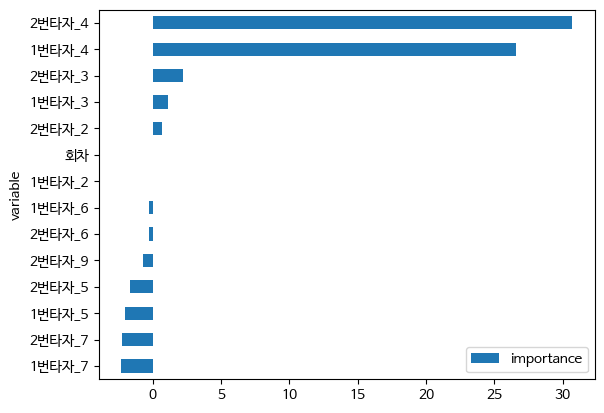

In [ ]:
bar_df = pd.DataFrame({'importance':fitted_os.params.values[1:], 'variable':x.columns})
bar_df.sort_values(by='importance').plot(x='variable', y='importance', kind='barh')
plt.show()
# 회귀계수 크기는 해당 변수가 종속변수(득점)에 영향을 주는 크기로 해석할 수 있다. 즉, 회귀계수로 출루의 종류에 따라 득점에 주는 영향력을 파악할 수 있다.
# 2번타자_4 출루정보와 1번타자_4 출루정보가 득점에 큰 영향을 주는 것으로 보인다.

In [ ]:
'''
bar_df = pd.DataFrame({'importance':lr_os.coef_.ravel(), 'variable':x.columns})
bar_df.sort_values(by='importance').plot(x='variable', y='importance', kind='barh')
plt.show() # 로지스틱 회귀분석 모델의 회귀계수로 보아,출루의 종류에 따라 득점에 주는 영향력을 파악할 수 있다.
'''

"\nbar_df = pd.DataFrame({'importance':lr_os.coef_.ravel(), 'variable':x.columns})\nbar_df.sort_values(by='importance').plot(x='variable', y='importance', kind='barh')\nplt.show() # 로지스틱 회귀분석 모델의 회귀계수로 보아,출루의 종류에 따라 득점에 주는 영향력을 파악할 수 있다.\n"

문제 5)
제품 A의 불량률은 0.03이다. 25개의 제품을 뽑았을 때 3개가 불량일 확률을 구하시오. (소수점 다섯 째 자리에서 반올림)

In [ ]:
# p(불량)=0.03이고, 25개 중 3개가 불량일 확률은 25C3*p^3*(1-p)^22 이다.
import numpy as np
from numpy import math
fac = math.factorial # factorial 연산
def combi(a,b): #combination 함수 정의
    result = fac(a)/fac(b)/fac(a-b)
    return result

p = 0.03 # 불량률
n = 25   # 총 제품 수
f = 3    # 불랭 제품 수

answer = np.round(combi(n,f)*(p**f)*((1-p)**(n-f)),5)
answer

0.03177

문제 6)
C사 생산 제품 1000개 중 양품이 600개, D사 생산 제품 500개 중 양품이 200개 이다. 두 회사의 양품률에 차이가 있는지 검정하여라.

In [ ]:
# 독립표본 모비율 차이의 가설검정. 양측검정. 유의수준 0.05
# H0 : C사 생산 제품의 양품률과 D사 생산 제품의 양품률에는 차이가 없다.
# H1 : C사 생산 제품의 양품률과 D사 생산 제품의 양품률에는 차이가 있다.

from scipy.stats import norm
n_c = 1000      # c회사 제품 수
n_d = 500       # d회사 제품 수
p_c = 600/1000  # c회사 제품 표본으로 뽑았을 때, 양품/제품 수
p_d = 200/500   # d회사 제품 표본으로 뽑았을 때, 양품/제품 수
d = p_c - p_d   # 표본 양품률 차
test_a = 0.05   # 유의수준 0.05
d0 = 0          # 귀무가설 양품률 차 = 0

pe = (n_c*p_c + n_d*p_d) / (n_c+n_d) # 합동표본비율
SE = np.sqrt(pe*(1-pe)*(1/n_c+1/n_d)) # SE
zstat = (d-d0) / SE # 검정통계량

sp = (1-norm.cdf(np.abs(zstat)))*2 # 유의수준
cv = norm.ppf(1-test_a/2) # 임계값
print('임계값(기각역)',cv) # 검정통계량 > 기각역이면 귀무가설을 기각하고 대립가설을 채택한다.
print('검정통계량',zstat)
print('유의수준',test_a)
print('유의확률',sp)

임계값(기각역) 1.959963984540054
검정통계량 7.319250547113997
유의수준 0.05
유의확률 2.4935609133081016e-13


In [ ]:
# 유의확률이 0.00로 유의수준 0.05보다 작으므로 H0 귀무가설을 기각할 수 있다.
# 마찬가지로, 검정통계량이 7.31925로 기각역 1.95996보다 크기 때문에 유의수준 0.05에서 귀무가설을 기각하고 대립가설을 채택할 수 있다.

# C,D 두 회사의 생산 제품의 양품률에 차이가 있다고 할 수 있다.

문제 7)
아래 데이터는 a,b,c,d 네 차종 각각 5회 실험 시 범퍼 파손 정도 이다. (단, 각 모집단은 정규분포를 따르며 모집단 간 등분산성을 가정한다.)

In [ ]:
# 정규성과 등분산성을 가정하였다. 네 차종 모두 실험 횟수가 같으므로 동일한 반복의 4개 집단에 대한 one-way ANOVA 검정(완전확률화계획법)을 수행한다.
import pandas as pd
from statsmodels.stats.oneway import anova_oneway
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p7.csv')
df # melt 데이터

,name,ratio
0,A,10.993428
1,A,9.723471
2,A,11.295377
3,A,13.046060
4,A,9.531693
5,B,14.297589
6,B,19.737638
7,B,17.302304
8,B,13.591577
9,B,16.627680


1) 각 차종 별 범퍼 파손의 정도에 차이가 유의한지 검정하라.

In [ ]:
# H0 : 각 차종 별 범퍼 파손의 정도에 차이가 없다. (u_a=u_b=u_c=u_d)
# H1 : 각 차종 별 범퍼 파손의 정도에 차이가 있다. (Not H0)

In [ ]:
oa = anova_oneway(data = df['ratio'],
                  groups=df['name'],
                  use_var = 'equal')
print('검정통계량:',oa.statistic, "유의확률:",oa.pvalue)

검정통계량: 24.976953075185296 유의확률: 2.8174779556216314e-06


In [ ]:
# 유의확률이 0.00으로 유의수준 0.05보다 작기 때문에, 귀무가설을 기각하고 대립가설을 채택한다.

2) 귀무가설을 채택한다면 그 의미를 해석하고, 귀무가설을 기각하였다면 사후분석을 시행하라.

In [ ]:
# 귀무가설을 기각하였으므로 어느 차종 간에 파손 정도에 차이가 유의한지 알기 위해 사후분석을 시행한다.
# 정규성, 등분산산성을 만족하고 각 차종별 실험 회수가 동일하므로 Tukey HDS 사후분석을 시행한다.
from statsmodels.sandbox.stats.multicomp import MultiComparison
import matplotlib.pyplot as plt
# from scipy.stats import ttest_id
mc = MultiComparison(data = df['ratio'],
                     groups = df['name']).tukeyhsd(alpha=0.05)
print(mc)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B   5.3934  0.001   2.1785  8.6083   True
     A      C  -4.2156 0.0085  -7.4305 -1.0007   True
     A      D  -0.7086 0.9207  -3.9235  2.5063  False
     B      C   -9.609    0.0 -12.8239 -6.3941   True
     B      D   -6.102 0.0003  -9.3169 -2.8871   True
     C      D    3.507 0.0302   0.2921  6.7219   True
-----------------------------------------------------


In [ ]:
# 차종 A-B, A-C, B-C, B-D, C-D 간 차이는 유의확률(p-adj)이 모두 유의수준 0.05보다 작으므로 유의미하다(귀무가설을 reject)고 할 수 있다.
# 차종 A-D 간 차이는 유의확률이 0.9207로 0.05보다 크므로 귀무가설을 채택하여 차이가 없다고 할 수 있다.

# 차종 A-B, A-C, B-C, B-D, C-D 간에 범퍼 파손 정도에 차이가 있다고 할 수 있다.

문제 8)
L1, L2, L3 세 개의 생산라인에서 각각 13%, 37%, 50%를 생산하며 각각 1.1% , 2.1%, 3.3% 불량률을 갖는다. 불량 제품이 나왔을 때 L1 라인에서 생산되었을 확률을 구하시오. (소수점 둘째자리에서 반올림)

In [ ]:
# 베이즈 정리
l1 = 0.13       # L1 생산라인에서 전체 생산 비율
l2 = 0.37       # L2 생산라인에서 전체 생산 비율
l3 = 0.50       # L3 생산라인에서 전체 생산 비율

f_l1 = 0.011    # L1 생산라인에서의 불량률
f_l2 = 0.021    # L2 생산라인에서의 불량률
f_l3 = 0.033    # L3 생산라인에서의 불량률

l1_f = (l1*f_l1) / (l1*f_l1 + l2*f_l2 + l3*f_l3) # 불량이 나왔을 때 L1 생산라인에서 생산되었을 확률
np.round(l1_f,2)

0.06

In [ ]:
# 끝